# Guía para hacer visualizaciones

### Ejemplo de datos para graficar

In [1]:
import pandas as pd

In [2]:
df_s = pd.read_csv("../../../data/lord-of-the-rings-data/lotr_scripts.csv")

In [3]:
df_s.head()

,Unnamed: 0,char,dialog,movie
0,0,DEAGOL,"Oh Smeagol Ive got one! , Ive got a fish Smeag...",The Return of the King
1,1,SMEAGOL,"Pull it in! Go on, go on, go on, pull it in!",The Return of the King
2,2,DEAGOL,Arrghh!,The Return of the King
3,3,SMEAGOL,Deagol!,The Return of the King
4,4,SMEAGOL,Deagol!,The Return of the King


In [4]:
df_g = pd.DataFrame(df_s.groupby('char')['dialog'].count()).reset_index().sort_values('dialog', ascending = False)
df_g = df_g.rename(columns = {'dialog':'Cuenta'}).reset_index(drop=True)
df_g = df_g.head(10)
df_g.head(10)

,char,Cuenta
0,FRODO,225
1,SAM,216
2,GANDALF,204
3,ARAGORN,185
4,PIPPIN,163
5,MERRY,137
6,GOLLUM,133
7,GIMLI,115
8,THEODEN,110
9,FARAMIR,65


# Grafico de barras

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('https://raw.githubusercontent.com/datatrooper/instatrooper/master/styles/bluetrooper.mplstyle')
dp = [
    "#e6d3ad",
    "#967B4F",
    "#46493D",
    "#839DA5",
    "#9FADAD",
    "#2B4144",
    "#986E37"
]

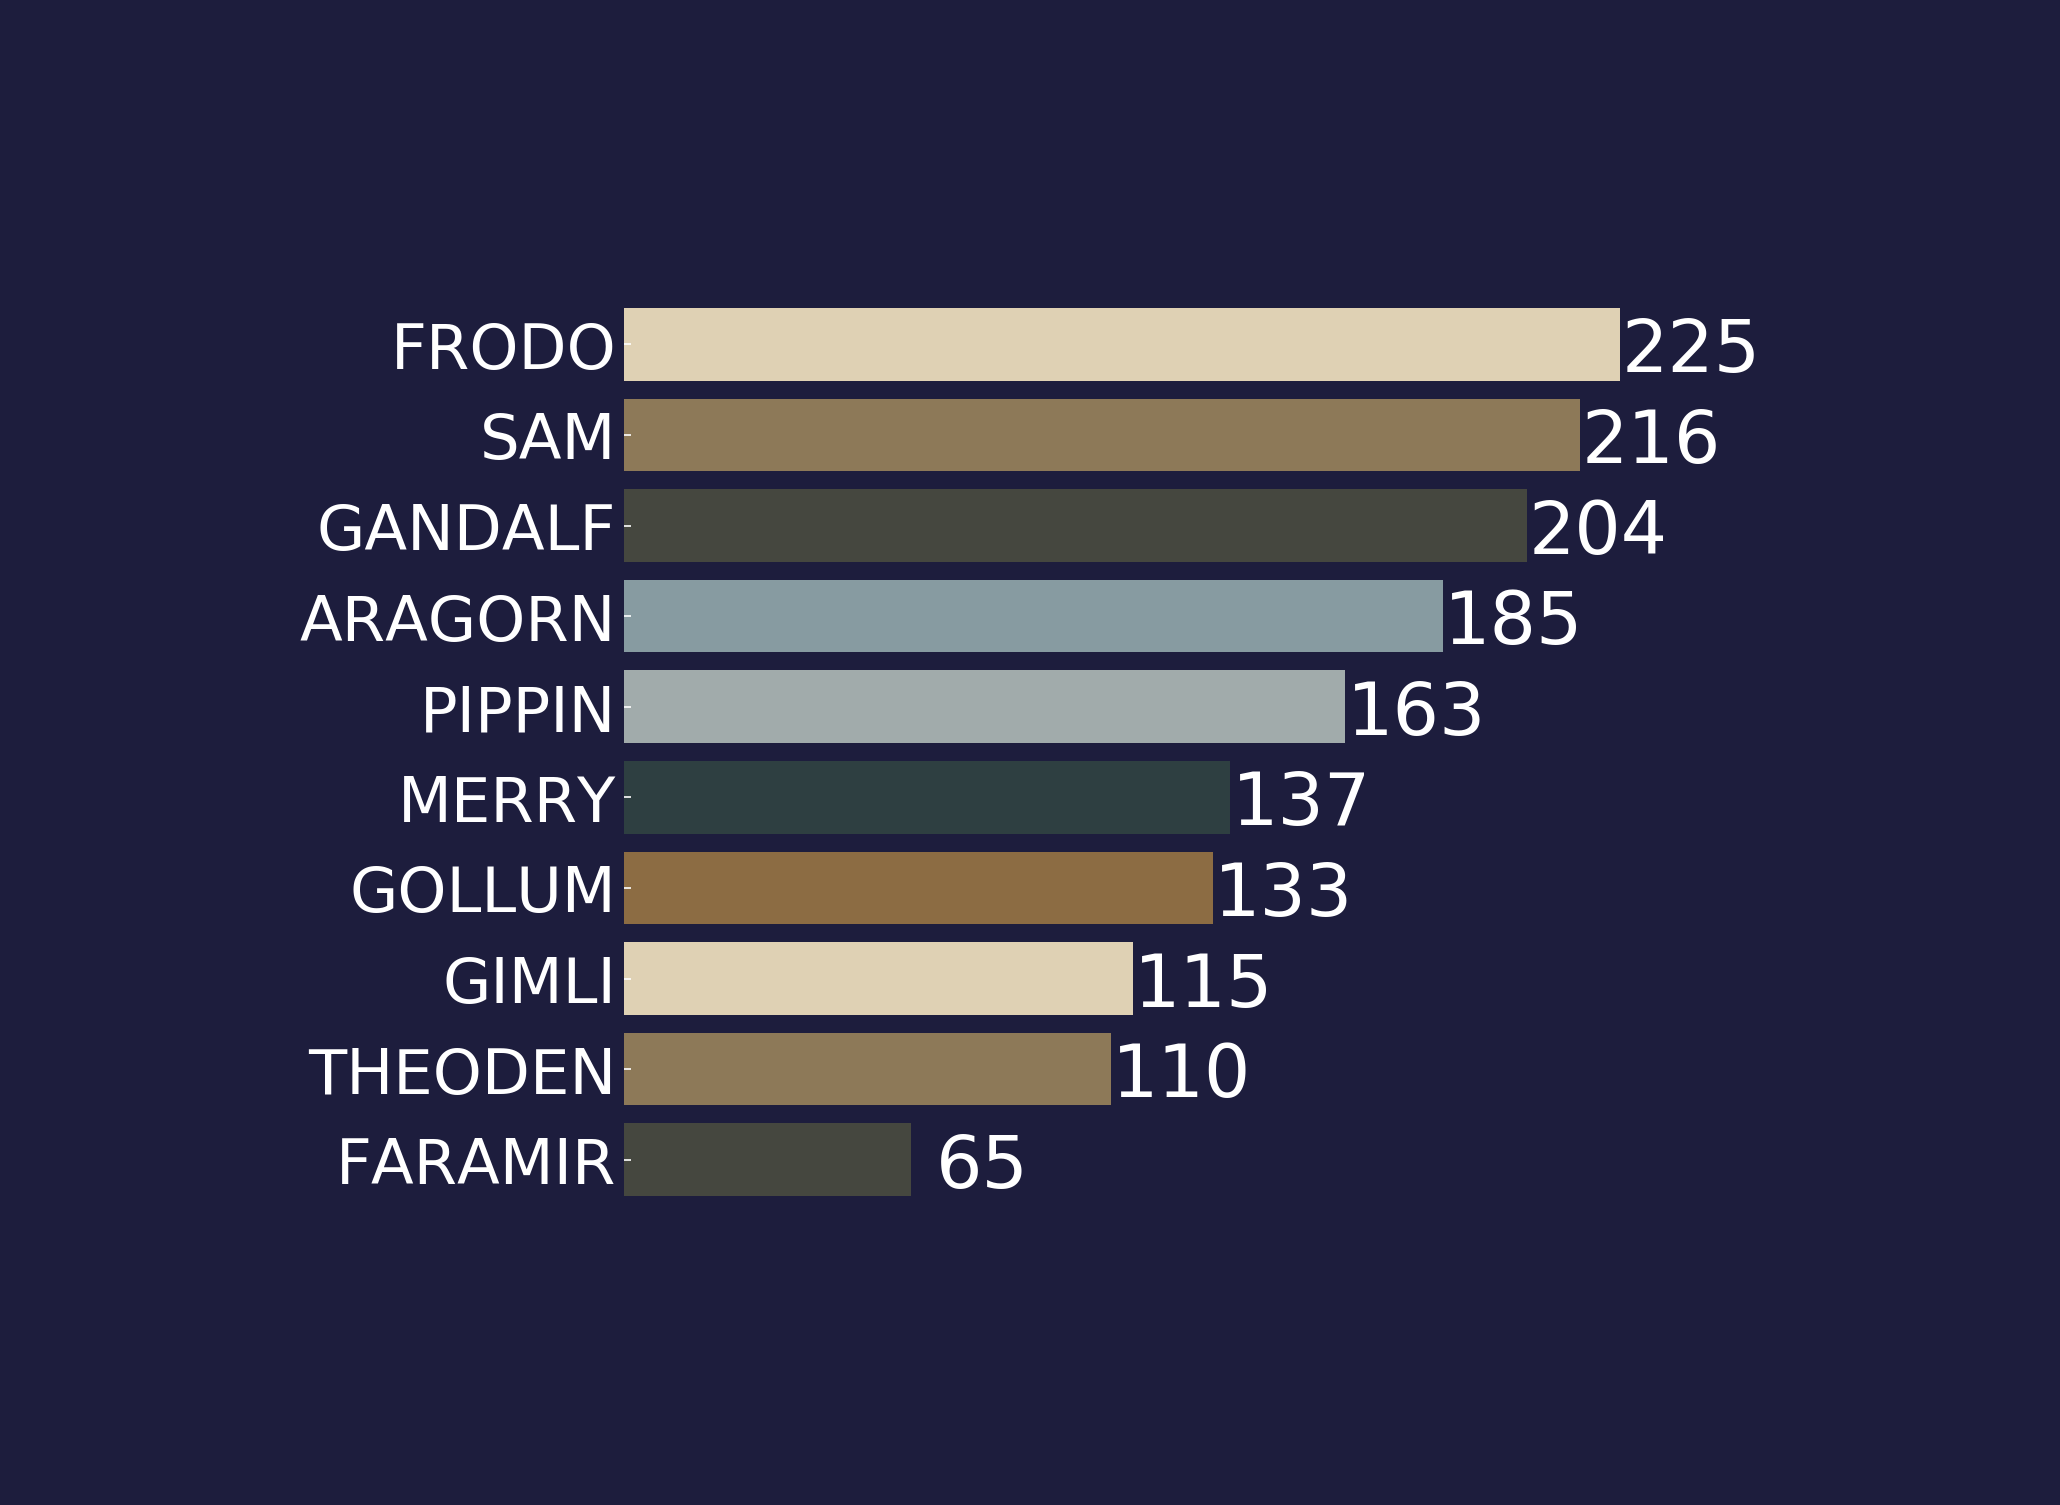

In [15]:
fig = plt.figure(figsize=(9,8))
ax = sns.barplot(x = "Cuenta", y="char", data=df_g, orient="h", palette=dp)
plt.grid(False)
plt.title("")
ax.set_xlabel("", fontsize=30)
ax.set_ylabel("", fontsize=30)

plt.xticks([])
plt.box(False)


# jugar con estos valores
vertical_offset = 0.3
horizontal_offset = 16

for index, row in df_g.iterrows():
    ax.text(row["Cuenta"] + horizontal_offset,index+vertical_offset, # posicion
            row["Cuenta"], # texto
            color='#FFFFFF', 
            ha="center", 
            size=35)

ax.tick_params(axis='both', which='major', labelsize=30)
plt.savefig('lotr_dialogos_todas.png',bbox_inches='tight', transparent="True", pad_inches = 0)
plt.show()

# Nubes de palabras

In [17]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import numpy as np

In [18]:
def white_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "rgb(230, 217, 168)" 

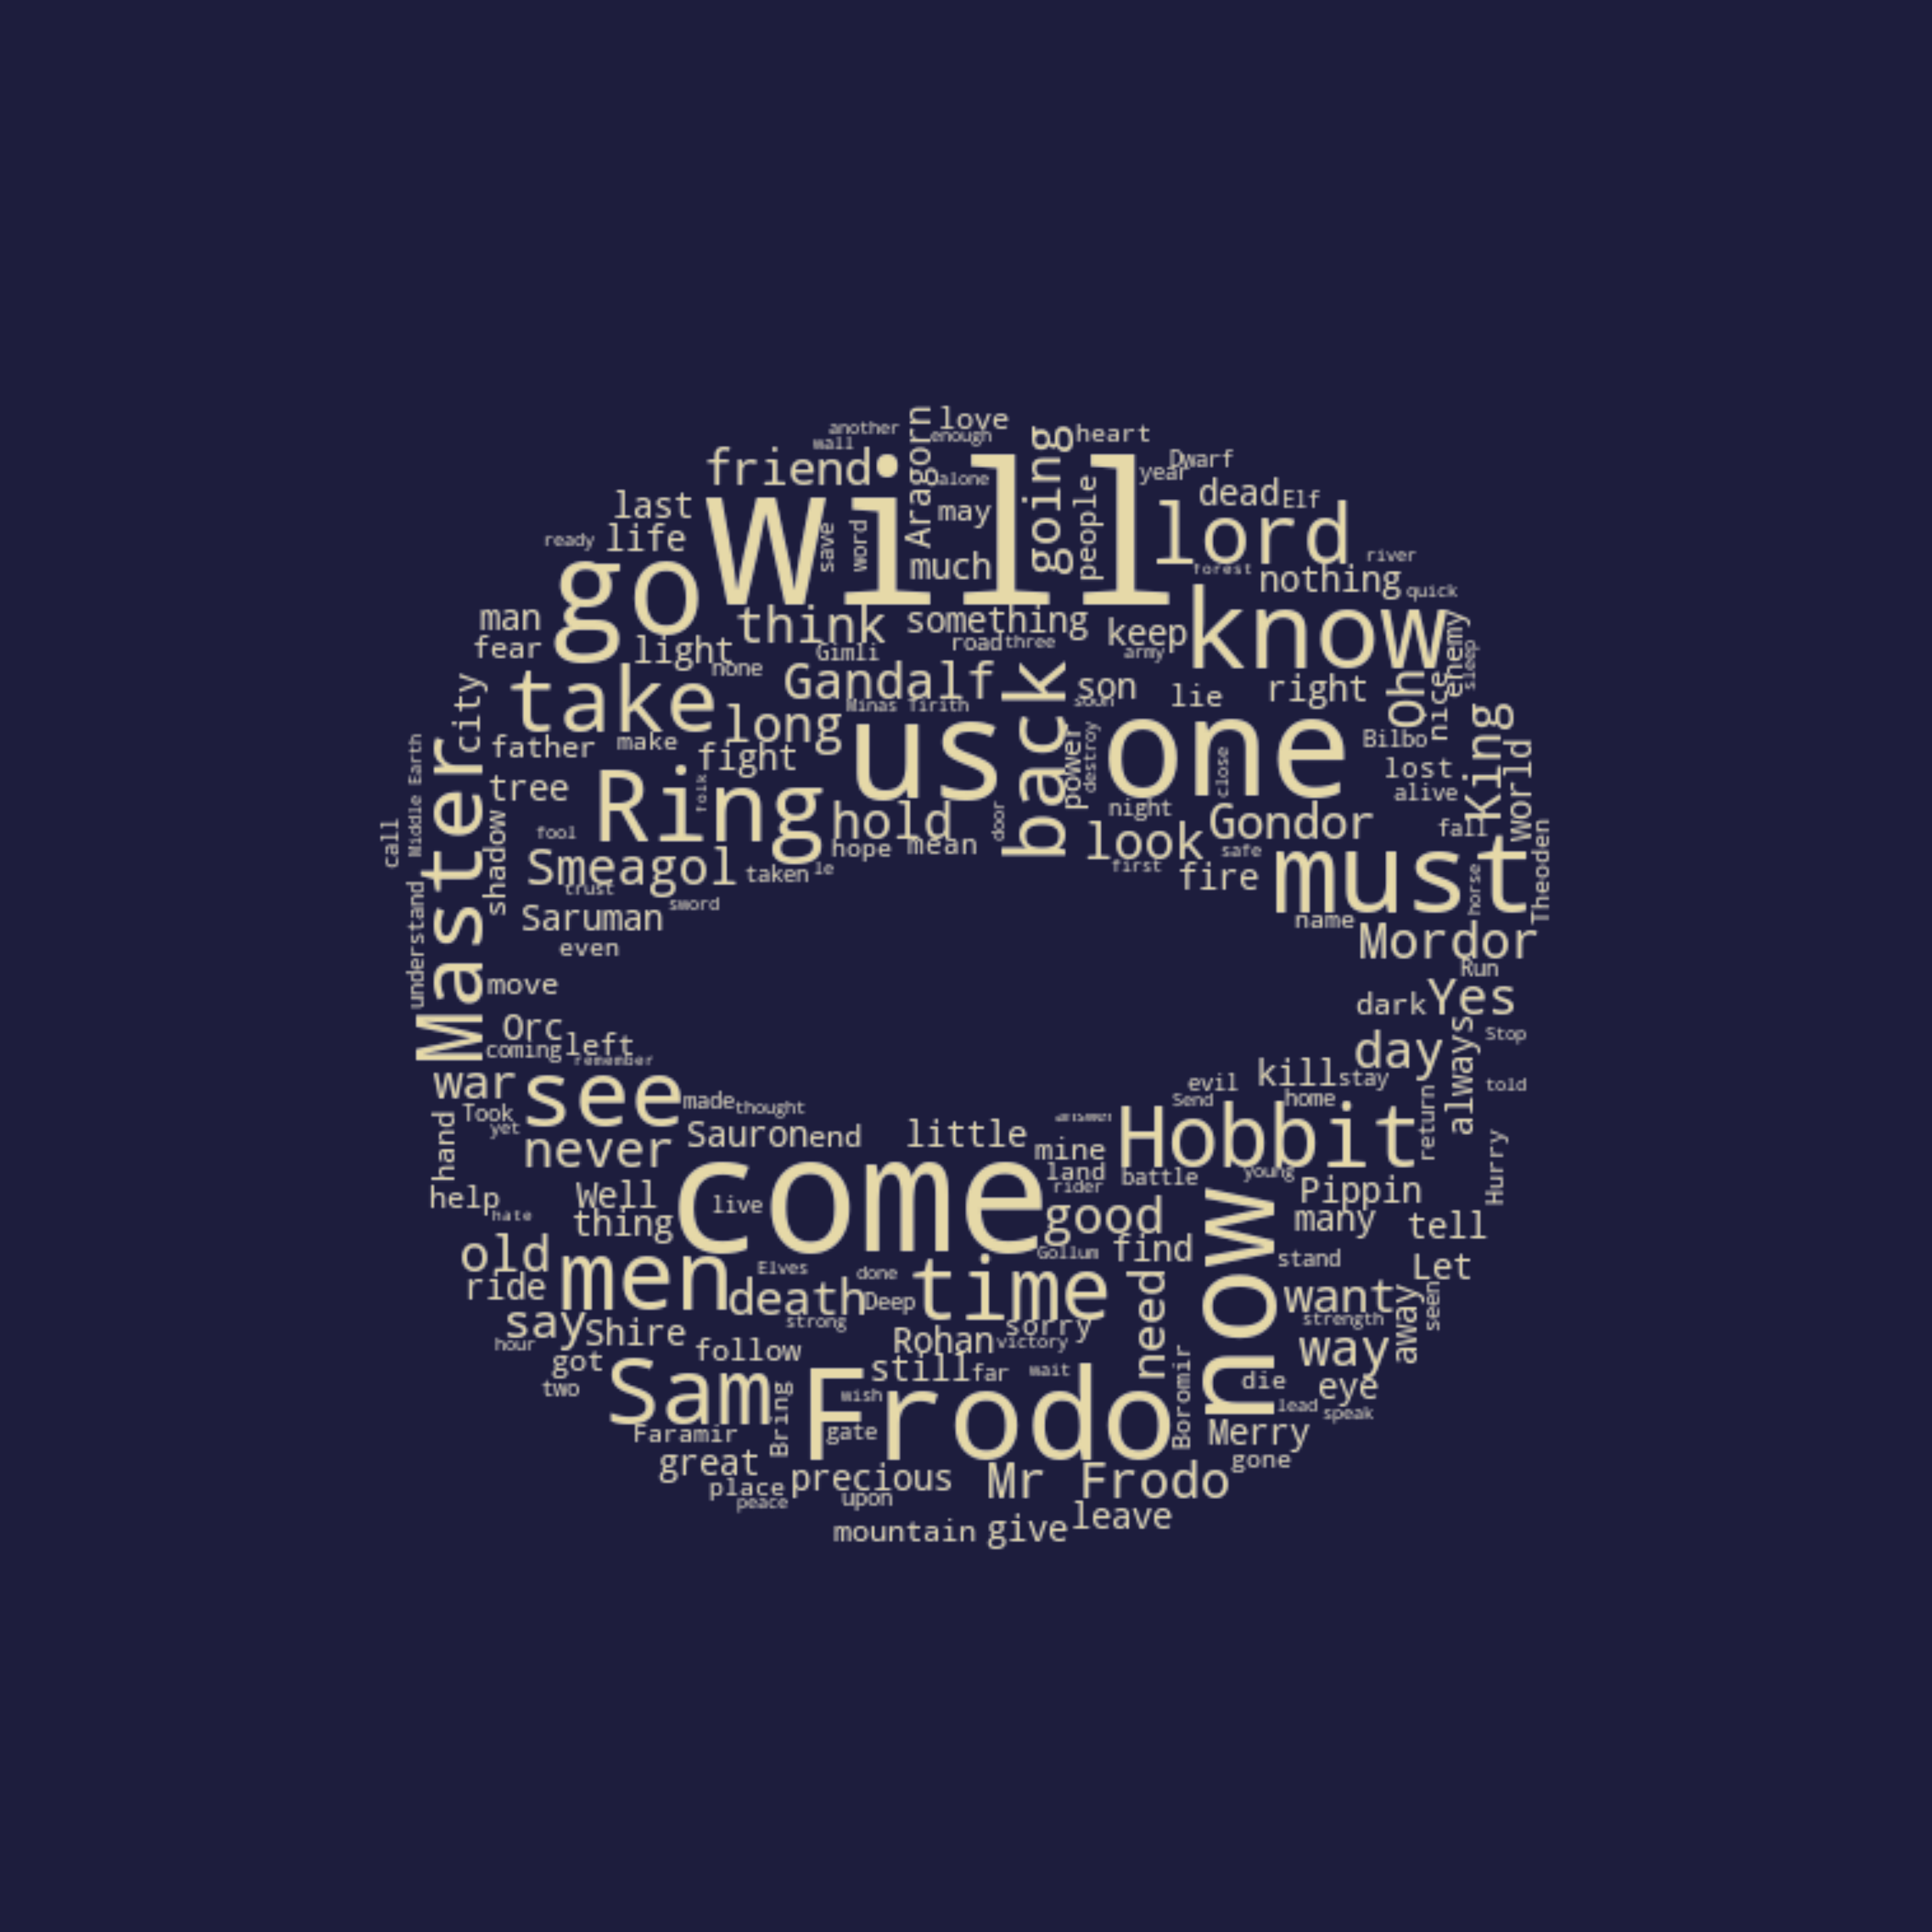

In [21]:
glasses_mask = np.array(Image.open("../../../data/lord-of-the-rings-data/rings.jpg"))

wc = WordCloud(background_color="rgba(255, 255, 255, 0)", mode="RGBA",
               width=500,
               height=1000,
               mask=glasses_mask,
               #contour_width=3,
               #contour_color='rgb(107, 190, 184)'
              ).generate(','.join(str(v) for v in df_s.dialog))
wc.recolor(color_func=white_color_func, random_state=336)

fig = plt.figure(figsize=(50,20))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig(f'nube1.png',bbox_inches='tight', transparent="True", pad_inches = 0)
plt.show()

# Gráfico de torta

In [22]:
df_c = pd.read_csv("../../../data/lord-of-the-rings-data/lotr_characters.csv")
df_g = df_c['gender'].dropna()

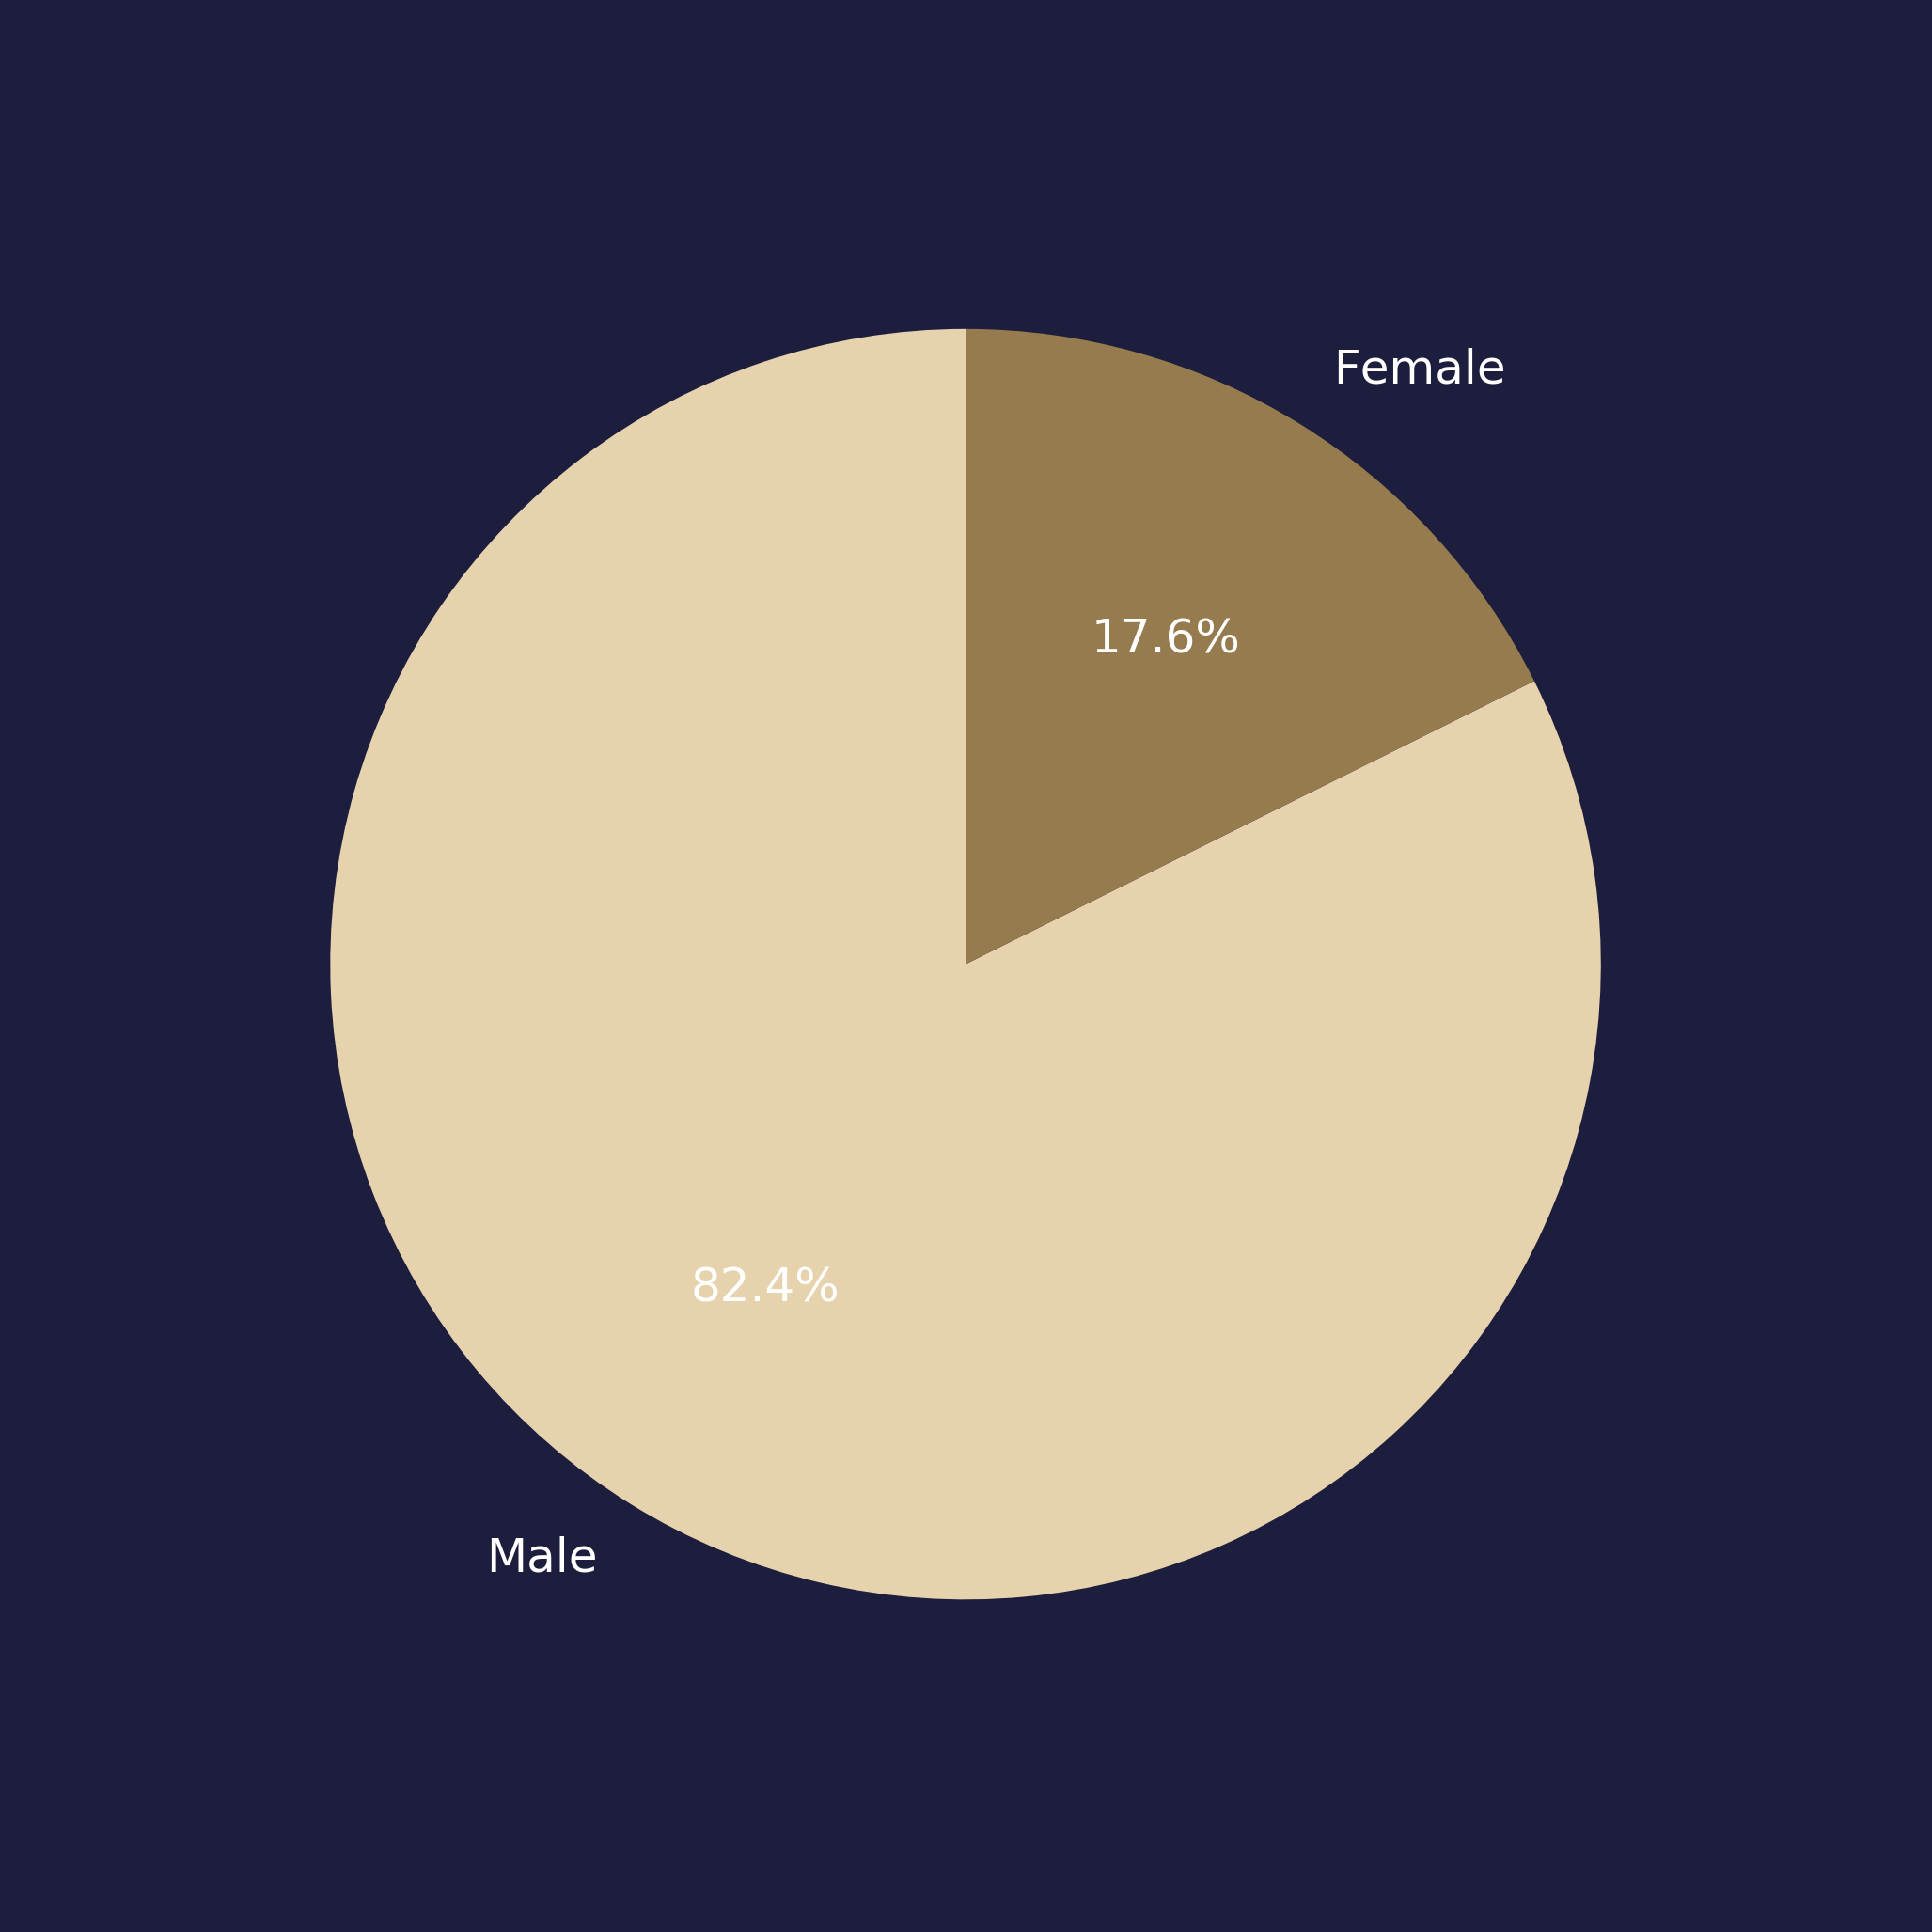

In [23]:
labels = ['Male', 'Female']
fig1, ax1 = plt.subplots()
ax1.pie(df_g.value_counts().head(2), labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 24, 'color':'white'})
ax1.axis('equal')
plt.tight_layout()
plt.savefig('lotr_generos.png',bbox_inches='tight', transparent="True", pad_inches = 0)
plt.show()